In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
import pandas as pd
import osmnx as ox


In [2]:
noise = gpd.read_file("data/noise.zip")
transport_lines = gpd.read_file("data/transport_lines.zip")
metro_entrences = gpd.read_file("data/metro_entrences.zip")
#roadss = gpd.read_file("data/roads.zip")
#roads = pd.read_csv("data/roads.csv", encoding="utf-8")
pictures = gpd.read_file("data/podzial_na_obrazki.csv")

In [3]:
city = "Praha"
roads = ox.graph_from_place(city, network_type="drive")

# Extract roads and their attributes
roads = ox.graph_to_gdfs(roads, nodes=False, edges=True)

In [4]:
roads.dtypes

osmid         object
highway       object
lanes         object
name          object
oneway          bool
reversed      object
length       float64
geometry    geometry
maxspeed      object
tunnel        object
ref           object
access        object
bridge        object
junction      object
width         object
area          object
dtype: object

In [5]:
noise.crs

<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Czechia; Slovakia.
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [6]:
roads = roads.to_crs(noise.crs)

In [7]:
roads.crs

<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Czechia; Slovakia.
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1210919062.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


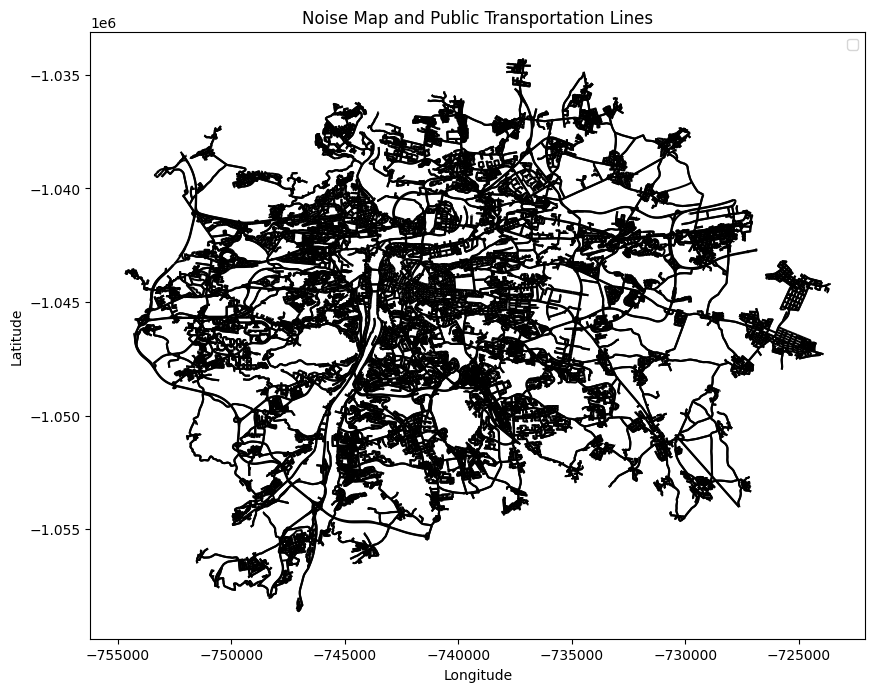

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))


roads.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [9]:
def parse_polygon(polygon_string):
    try:
        # Remove "POLYGON ((" and "))", then split coordinates
        coords_string = polygon_string.replace("POLYGON ((", "").replace("))", "")
        coords = [
            tuple(map(float, coord.split()))  # Convert each pair into a tuple of floats
            for coord in coords_string.split(", ")
        ]
        return Polygon(coords)  # Create Shapely Polygon
    except Exception as e:
        # Handle errors (e.g., malformed strings)
        print(f"Error parsing polygon: {polygon_string}, error: {e}")
        return None

In [10]:
pictures

,geometry
0,POLYGON ((-746187.4291304341 -1058799.60000000...
1,POLYGON ((-747663.5678260861 -1058799.60000000...
2,POLYGON ((-749139.7065217382 -1058799.60000000...
3,POLYGON ((-750615.8452173902 -1058799.60000000...
4,POLYGON ((-752091.9839130423 -1055715.05750000...
...,...
257,POLYGON ((-740282.8743478258 -1034123.26000000...
258,POLYGON ((-738806.7356521736 -1034123.26000000...
259,POLYGON ((-737330.5969565216 -1034123.26000000...
260,POLYGON ((-735854.4582608695 -1034123.26000000...


In [11]:
pictures = gpd.GeoDataFrame(pictures).rename(columns={0: "geometry"})

In [12]:
pictures.dtypes

geometry    object
dtype: object

In [13]:
pictures["geometry"] = pictures["geometry"].apply(parse_polygon)
df = pictures.dropna(subset=["geometry"])

In [14]:
pictures.set_geometry('geometry', inplace=True)

In [15]:
pictures.dtypes

geometry    geometry
dtype: object

C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1195018545.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


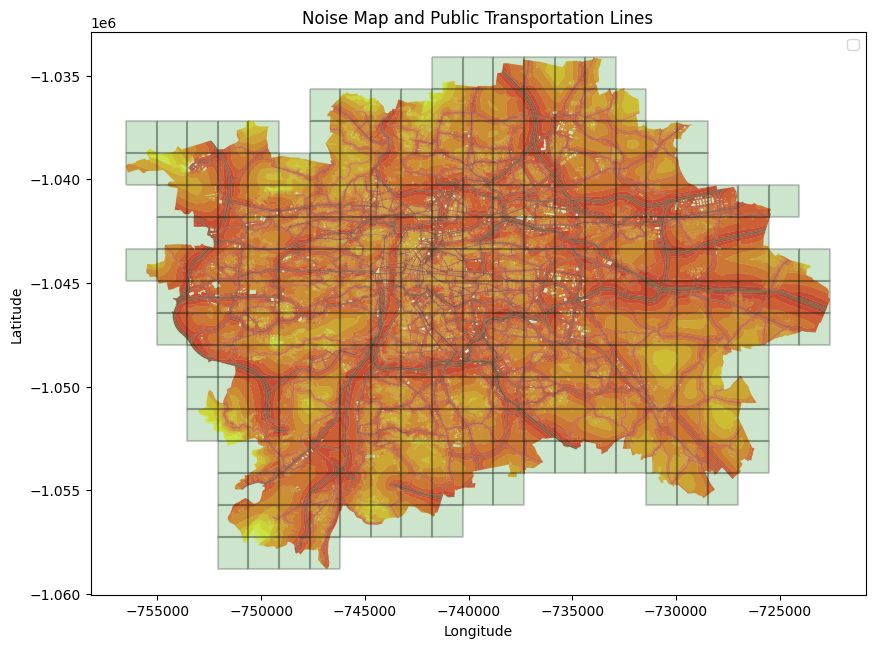

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

pictures.plot(ax=ax, alpha = 0.2, color="green",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [17]:
import numpy as np

In [18]:
picture = pictures['geometry'][70]

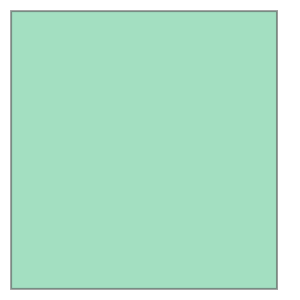

In [19]:
picture

In [20]:
noise_for_pixel = gpd.clip(noise, picture)


In [21]:
noise_for_pixel

,DB_LO,DB_HI,SHAPE_LEN,geometry
0,5.0,10.0,7.617187e+05,"MULTIPOLYGON (((-741660 -1049619.094, -741659...."
1,10.0,15.0,8.163733e+05,"MULTIPOLYGON (((-741660 -1049618.227, -741658...."
2,15.0,20.0,8.648527e+05,"MULTIPOLYGON (((-741660 -1049617.361, -741657...."
3,20.0,25.0,9.233291e+05,"MULTIPOLYGON (((-741660 -1049616.494, -741656...."
4,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-741660 -1049615.628, -741656...."
5,30.0,35.0,1.280995e+06,"MULTIPOLYGON (((-740512.151 -1050670, -740510 ..."
6,35.0,40.0,2.186663e+06,"MULTIPOLYGON (((-740290 -1050914.779, -740294...."
17,0.0,5.0,1.958162e+05,"MULTIPOLYGON (((-741670 -1049679.949, -741660 ..."
13,70.0,75.0,1.423969e+06,"MULTIPOLYGON (((-741249.533 -1049550, -741250 ..."
12,65.0,70.0,2.777230e+06,"MULTIPOLYGON (((-741228.807 -1049550, -741230 ..."


C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\3012404049.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


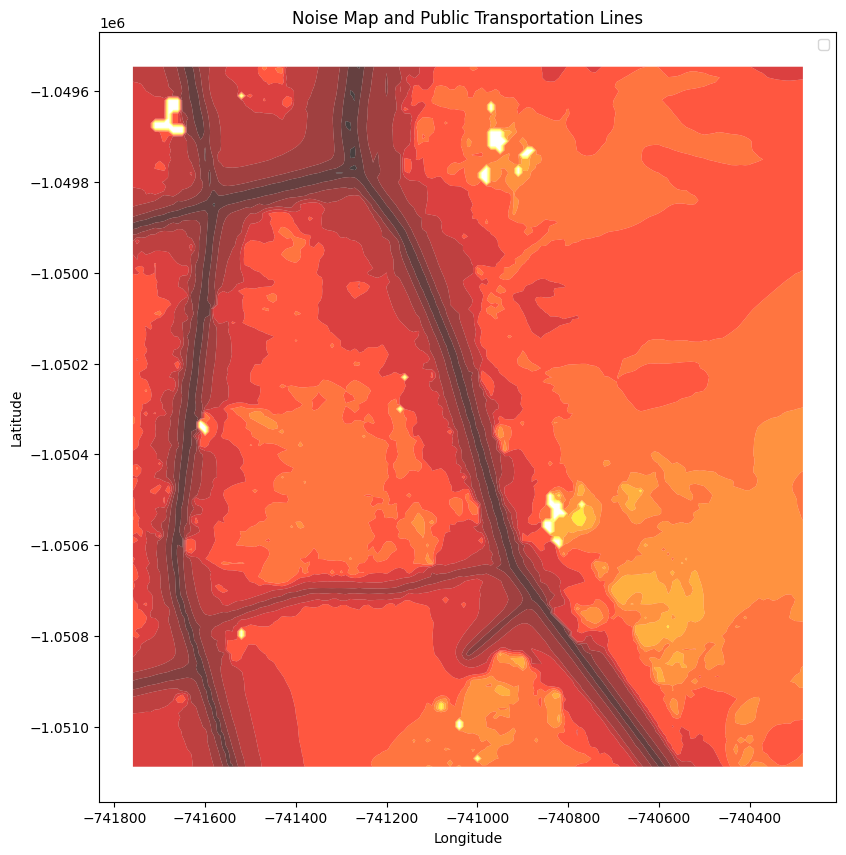

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)


# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [23]:
roads_for_pixel = gpd.clip(roads, picture)

C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1462096734.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


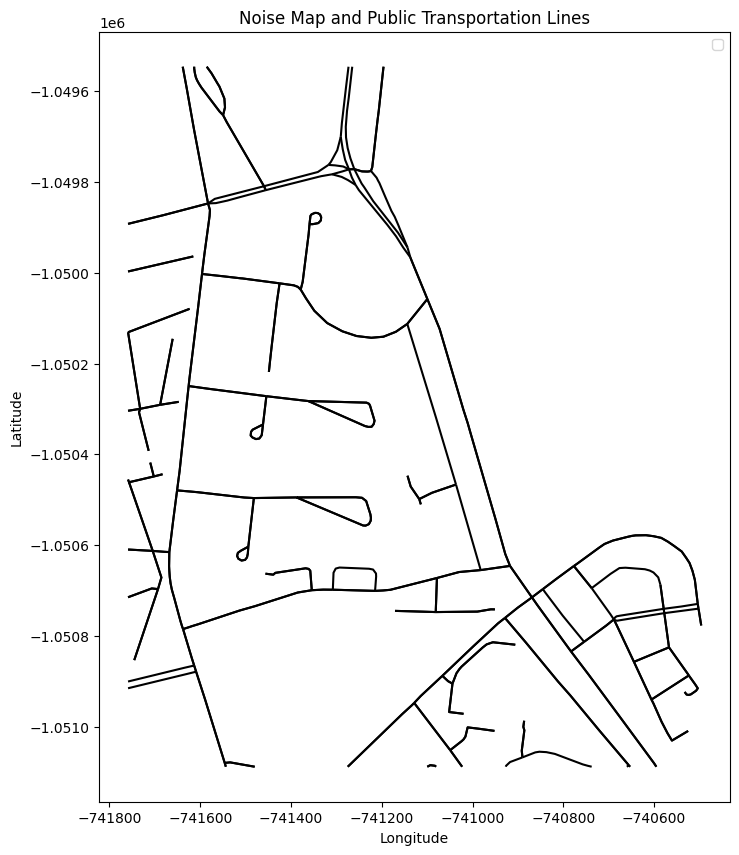

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))


roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1633770927.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


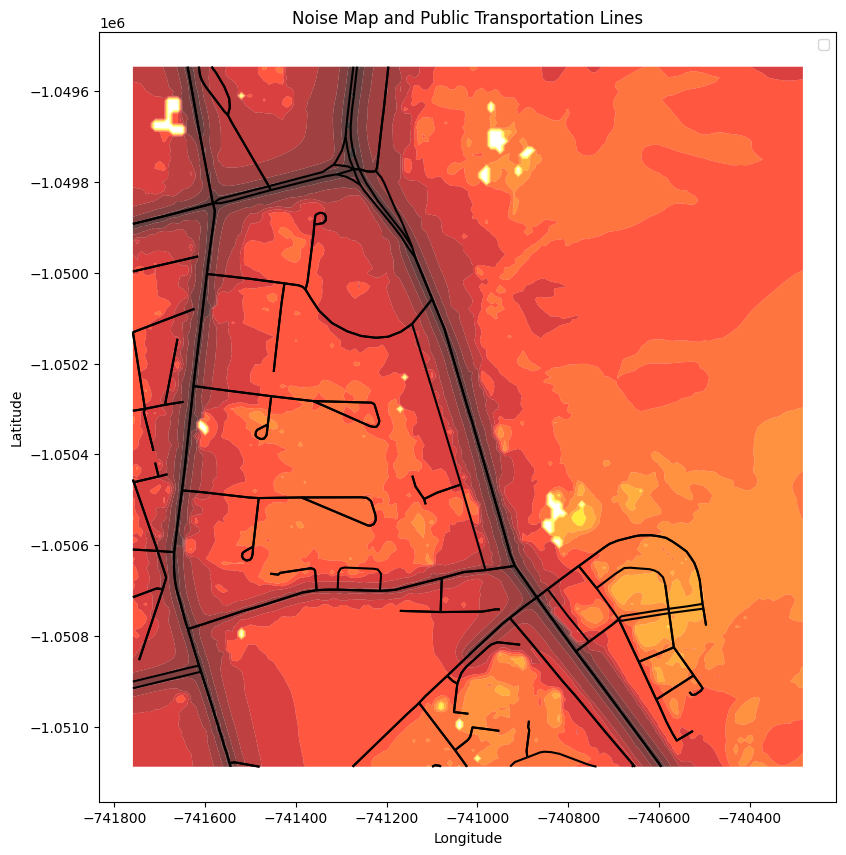

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [26]:
from shapely.ops import split
import geopandas
from shapely.geometry import MultiPolygon, Polygon
from shapely.geometry import LineString

def get_squares_from_rect(RectangularPolygon, side_length=0.0025):
    """
    Divide a Rectangle (Shapely Polygon) into squares of equal area.

    `side_length` : required side of square

    """
    rect_coords = np.array(RectangularPolygon.boundary.coords.xy)
    y_list = rect_coords[1]
    x_list = rect_coords[0]
    y1 = min(y_list)
    y2 = max(y_list)
    x1 = min(x_list)
    x2 = max(x_list)
    width = x2 - x1
    height = y2 - y1

    xcells = int(np.round(width / side_length))
    ycells = int(np.round(height / side_length))

    yindices = np.linspace(y1, y2, ycells + 1)
    xindices = np.linspace(x1, x2, xcells + 1)
    horizontal_splitters = [
        LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
    ]
    vertical_splitters = [
        LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
    ]
    result = RectangularPolygon
    for splitter in vertical_splitters:
        result = MultiPolygon(split(result, splitter))
    for splitter in horizontal_splitters:
        result = MultiPolygon(split(result, splitter))
    square_polygons = list(result.geoms)

    return square_polygons


def split_polygon(G, number_of_pixels_on_side = 100, thresh=0.99):
    side_length = int(1500 / number_of_pixels_on_side)
    assert side_length>0, "side_length must be a float>0"
    Rectangle    = G.envelope
    squares      = get_squares_from_rect(Rectangle, side_length=side_length)
    SquareGeoDF  = geopandas.GeoDataFrame(squares).rename(columns={0: "geometry"})
    SquareGeoDF.set_geometry('geometry', inplace=True)
    Geoms        = SquareGeoDF[SquareGeoDF.intersects(G)].geometry.values
    geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= thresh]
    return geoms

In [27]:
pixels   = split_polygon(picture, thresh=0.99, number_of_pixels_on_side = 25)

In [28]:
pixels

[<POLYGON ((-740282.874 -1051088.244, -740341.92 -1051088.244, -740341.92 -10...>,
 <POLYGON ((-740341.92 -1051088.244, -740400.965 -1051088.244, -740400.965 -1...>,
 <POLYGON ((-740400.965 -1051088.244, -740460.011 -1051088.244, -740460.011 -...>,
 <POLYGON ((-740460.011 -1051088.244, -740519.057 -1051088.244, -740519.057 -...>,
 <POLYGON ((-740519.057 -1051088.244, -740578.102 -1051088.244, -740578.102 -...>,
 <POLYGON ((-740578.102 -1051088.244, -740637.148 -1051088.244, -740637.148 -...>,
 <POLYGON ((-740637.148 -1051088.244, -740696.193 -1051088.244, -740696.193 -...>,
 <POLYGON ((-740696.193 -1051088.244, -740755.239 -1051088.244, -740755.239 -...>,
 <POLYGON ((-740755.239 -1051088.244, -740814.284 -1051088.244, -740814.284 -...>,
 <POLYGON ((-740814.284 -1051088.244, -740873.33 -1051088.244, -740873.33 -10...>,
 <POLYGON ((-740873.33 -1051088.244, -740932.375 -1051088.244, -740932.375 -1...>,
 <POLYGON ((-740932.375 -1051088.244, -740991.421 -1051088.244, -740991.421 -...>,
 <PO

In [29]:
pixels = geopandas.GeoDataFrame(pixels).rename(columns={0: "geometry"})
pixels.set_geometry('geometry', inplace=True)

In [30]:
pixels

,geometry
0,"POLYGON ((-740282.874 -1051088.244, -740341.92..."
1,"POLYGON ((-740341.92 -1051088.244, -740400.965..."
2,"POLYGON ((-740400.965 -1051088.244, -740460.01..."
3,"POLYGON ((-740460.011 -1051088.244, -740519.05..."
4,"POLYGON ((-740519.057 -1051088.244, -740578.10..."
...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05..."
646,"POLYGON ((-740519.057 -1049545.973, -740460.01..."
647,"POLYGON ((-740460.011 -1049545.973, -740400.96..."
648,"POLYGON ((-740400.965 -1049545.973, -740341.92..."


C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1686622128.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


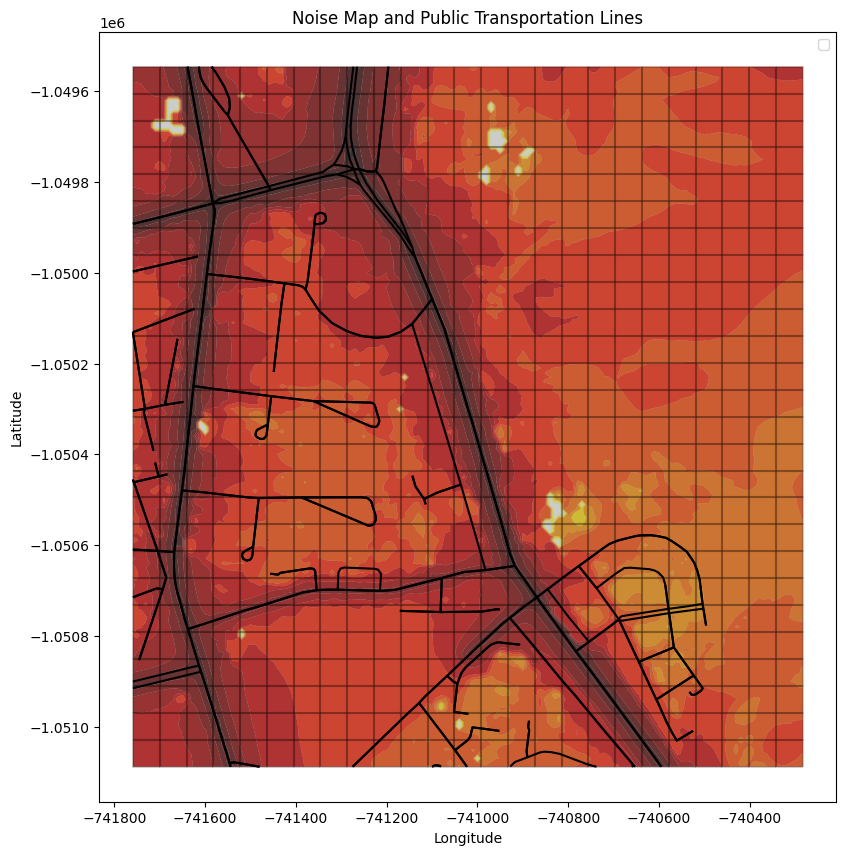

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)
pixels.plot(ax=ax, alpha = 0.2, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [32]:
pixels['has_road'] = pixels.geometry.apply(
    lambda square: roads_for_pixel.geometry.intersects(square).any()
)


In [33]:
pixels

,geometry,has_road
0,"POLYGON ((-740282.874 -1051088.244, -740341.92...",False
1,"POLYGON ((-740341.92 -1051088.244, -740400.965...",False
2,"POLYGON ((-740400.965 -1051088.244, -740460.01...",False
3,"POLYGON ((-740460.011 -1051088.244, -740519.05...",False
4,"POLYGON ((-740519.057 -1051088.244, -740578.10...",True
...,...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05...",False
646,"POLYGON ((-740519.057 -1049545.973, -740460.01...",False
647,"POLYGON ((-740460.011 -1049545.973, -740400.96...",False
648,"POLYGON ((-740400.965 -1049545.973, -740341.92...",False


In [34]:
roads_for_pixel

,,,osmid,highway,lanes,name,oneway,reversed,length,geometry,maxspeed,tunnel,ref,access,bridge,junction,width,area
u,v,key,,,,,,,,,,,,,,,,
119080524,119080508,0,13703343,residential,NaN,Trnková,True,False,126.561448,"LINESTRING (-740890.015 -1051067.65, -740917.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30991964,108478515,0,"[133482577, 361357804, 361357806, 592389454]",residential,2,K Výzkumným ústavům,False,False,147.615191,"LINESTRING (-740655.64 -1051085.182, -740652.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108478515,30991964,0,"[133482577, 361357804, 592389454, 361357806]",residential,2,K Výzkumným ústavům,False,True,147.615191,"LINESTRING (-740652.968 -1051088.244, -740655....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301555046,1425212314,0,246843351,residential,NaN,Za Valem,False,False,142.439930,"LINESTRING (-740605.865 -1050940.273, -740601....",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425212314,301555046,0,246843351,residential,NaN,Za Valem,False,True,142.439930,"LINESTRING (-740525.041 -1051009.416, -740560....",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31205982,31206281,0,4845227,residential,NaN,Na rovinách,False,False,78.779379,"LINESTRING (-741759.013 -1050304.005, -741732....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31206280,31206281,0,4845231,residential,NaN,V Pláni,False,False,170.685873,"LINESTRING (-741759.013 -1050131.153, -741732....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31206281,31206280,0,4845231,residential,NaN,V Pláni,False,True,170.685873,"LINESTRING (-741732.386 -1050299.681, -741759....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\kajet\AppData\Local\Temp\ipykernel_37764\1452690331.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")


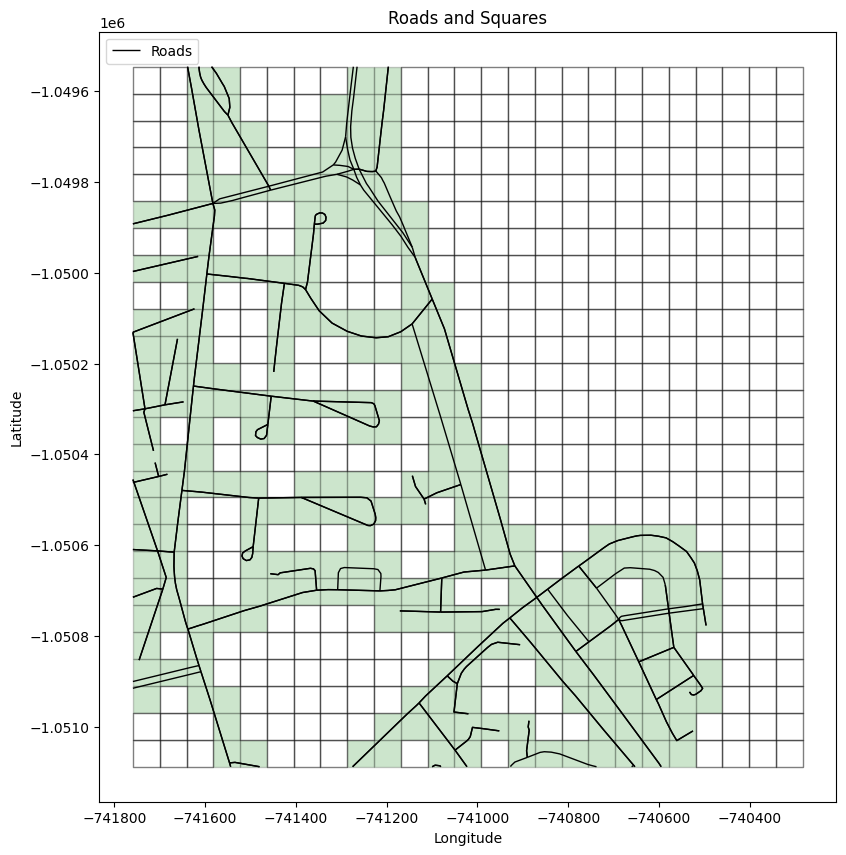

In [35]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the roads in black
roads_for_pixel.plot(ax=ax, color="black", linewidth=1, label="Roads")

# Plot the squares that contain roads in green
pixels[pixels['has_road']].plot(ax=ax, color="green", edgecolor="black", alpha=0.2, label="Squares with Roads")

# Plot the squares that do not contain roads in red
pixels[~pixels['has_road']].plot(ax=ax, color="white", edgecolor="black", alpha=0.5, label="Squares without Roads")

# Add legend
ax.legend(loc="upper left")

# Add title and labels
ax.set_title("Roads and Squares")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [43]:
def extract_max_speed(maxspeed):
    if isinstance(maxspeed, list):  
        # Convert list to numeric, drop NaN, take the highest value
        maxspeed_values = pd.to_numeric(maxspeed, errors="coerce")
        return max(maxspeed_values, default=-1)  # Return highest speed or -1 if empty
    elif pd.isna(maxspeed):  # If NaN, return -1
        return -1
    return pd.to_numeric(maxspeed, errors="coerce")  # Convert single value to numeric

In [87]:
roads_for_pixel["maxspeed"] = roads_for_pixel["maxspeed"].apply(extract_max_speed)

In [88]:
roads_for_pixel["maxspeed"].unique()

array([-1, 30, 50, 20])

In [89]:
def get_max_speed(pixel):
    intersecting_roads = roads_for_pixel[roads_for_pixel.geometry.intersects(pixel)]
    
    if not intersecting_roads.empty:
        # Convert 'maxspeed' column to numeric, handle missing values, and find the max
        return pd.to_numeric(intersecting_roads["maxspeed"], errors="coerce").max(skipna=True)
    
    return 0  # If no road is found in the square

In [90]:
pixels["max_speed"] = pixels.geometry.apply(get_max_speed)

In [91]:
pixels

,geometry,has_road,max_speed,num_lanes,weighted_db_hi
0,"POLYGON ((-740282.874 -1051088.244, -740341.92...",False,0,-1,50
1,"POLYGON ((-740341.92 -1051088.244, -740400.965...",False,0,-1,45
2,"POLYGON ((-740400.965 -1051088.244, -740460.01...",False,0,-1,45
3,"POLYGON ((-740460.011 -1051088.244, -740519.05...",False,0,-1,55
4,"POLYGON ((-740519.057 -1051088.244, -740578.10...",True,30,-1,55
...,...,...,...,...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05...",False,0,-1,45
646,"POLYGON ((-740519.057 -1049545.973, -740460.01...",False,0,-1,50
647,"POLYGON ((-740460.011 -1049545.973, -740400.96...",False,0,-1,50
648,"POLYGON ((-740400.965 -1049545.973, -740341.92...",False,0,-1,50


In [92]:
pixels['max_speed'].unique()

array([ 0, 30, 50, -1, 20])

In [93]:
roads_for_pixel['lanes'].unique()

TypeError: unhashable type: 'list'

In [94]:
def extract_max_lanes(lanes):
    if isinstance(lanes, list):  
        # Convert list to numeric, drop NaN, take the highest value
        lane_values = pd.to_numeric(lanes, errors="coerce")
        return max(lane_values, default=-1)  # Return highest lanes or -1 if empty
    elif pd.isna(lanes):  # If NaN, return -1
        return -1
    return pd.to_numeric(lanes, errors="coerce")  # Convert single value to numeric

# Clean 'lanes' column
roads_for_pixel["lanes"] = roads_for_pixel["lanes"].apply(extract_max_lanes)

In [96]:
roads_for_pixel['lanes'].unique()

array([-1,  2,  3,  4,  5,  1])

In [97]:
def get_max_lanes(square):
    intersecting_roads = roads_for_pixel[roads_for_pixel.geometry.intersects(square)]
    
    if not intersecting_roads.empty:
        max_lanes = intersecting_roads["lanes"].max()
        return max_lanes if not pd.isna(max_lanes) else -1
    
    return -1  # If no road is found in the square, return -1

# Apply the function to each pixel
pixels["num_lanes"] = pixels.geometry.apply(get_max_lanes)

In [98]:
pixels

,geometry,has_road,max_speed,num_lanes,weighted_db_hi
0,"POLYGON ((-740282.874 -1051088.244, -740341.92...",False,0,-1,50
1,"POLYGON ((-740341.92 -1051088.244, -740400.965...",False,0,-1,45
2,"POLYGON ((-740400.965 -1051088.244, -740460.01...",False,0,-1,45
3,"POLYGON ((-740460.011 -1051088.244, -740519.05...",False,0,-1,55
4,"POLYGON ((-740519.057 -1051088.244, -740578.10...",True,30,-1,55
...,...,...,...,...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05...",False,0,-1,45
646,"POLYGON ((-740519.057 -1049545.973, -740460.01...",False,0,-1,50
647,"POLYGON ((-740460.011 -1049545.973, -740400.96...",False,0,-1,50
648,"POLYGON ((-740400.965 -1049545.973, -740341.92...",False,0,-1,50


In [99]:
pixels["num_lanes"].unique()

array([-1,  3,  2,  4,  5,  1])

In [65]:
noise_for_pixel

,DB_LO,DB_HI,SHAPE_LEN,geometry
0,5.0,10.0,7.617187e+05,"MULTIPOLYGON (((-741660 -1049619.094, -741659...."
1,10.0,15.0,8.163733e+05,"MULTIPOLYGON (((-741660 -1049618.227, -741658...."
2,15.0,20.0,8.648527e+05,"MULTIPOLYGON (((-741660 -1049617.361, -741657...."
3,20.0,25.0,9.233291e+05,"MULTIPOLYGON (((-741660 -1049616.494, -741656...."
4,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-741660 -1049615.628, -741656...."
5,30.0,35.0,1.280995e+06,"MULTIPOLYGON (((-740512.151 -1050670, -740510 ..."
6,35.0,40.0,2.186663e+06,"MULTIPOLYGON (((-740290 -1050914.779, -740294...."
17,0.0,5.0,1.958162e+05,"MULTIPOLYGON (((-741670 -1049679.949, -741660 ..."
13,70.0,75.0,1.423969e+06,"MULTIPOLYGON (((-741249.533 -1049550, -741250 ..."
12,65.0,70.0,2.777230e+06,"MULTIPOLYGON (((-741228.807 -1049550, -741230 ..."


In [66]:
def calculate_weighted_db(square, noise_gdf):
    total_area = square.area  # Total area of the square
    weighted_sum = 0  # Weighted sum of DB_HI
    total_weight = 0  # Total weight (should sum to 1 if fully covered)

    for _, noise in noise_gdf.iterrows():
        # Calculate intersection geometry between pixel and noise polygon
        intersection = square.intersection(noise.geometry)

        # If there's an intersection, calculate the weight and add to the weighted sum
        if intersection.is_valid and not intersection.is_empty:
            intersection_area = intersection.area
            weight = intersection_area / total_area  # Weight based on area covered
            weighted_sum += weight * noise["DB_HI"]
            total_weight += weight

    # Return the weighted average, default to 0 if there's no coverage
    return weighted_sum if total_weight > 0 else 0

# Apply the function to calculate weighted DB_HI for each pixel
pixels["weighted_db_hi"] = pixels.geometry.apply(lambda square: calculate_weighted_db(square, noise_for_pixel))

In [67]:
pixels

,geometry,has_road,max_speed,num_lanes,weighted_db_hi
0,"POLYGON ((-740282.874 -1051088.244, -740341.92...",False,0.0,-1,49.093797
1,"POLYGON ((-740341.92 -1051088.244, -740400.965...",False,0.0,-1,45.768767
2,"POLYGON ((-740400.965 -1051088.244, -740460.01...",False,0.0,-1,44.519432
3,"POLYGON ((-740460.011 -1051088.244, -740519.05...",False,0.0,-1,53.582255
4,"POLYGON ((-740519.057 -1051088.244, -740578.10...",True,30.0,-1,56.146986
...,...,...,...,...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05...",False,0.0,-1,46.806917
646,"POLYGON ((-740519.057 -1049545.973, -740460.01...",False,0.0,-1,48.297428
647,"POLYGON ((-740460.011 -1049545.973, -740400.96...",False,0.0,-1,50.000000
648,"POLYGON ((-740400.965 -1049545.973, -740341.92...",False,0.0,-1,51.256088


In [68]:
pixels["weighted_db_hi"]

array([49.09379657, 45.76876716, 44.51943228, 53.58225532, 56.14698646,
       69.02982503, 60.09864598, 52.36608073, 47.13638794, 44.97367905,
       44.88965727, 42.43503226, 43.98032425, 44.74040077, 44.93140986,
       46.48769962, 49.86705292, 50.        , 51.53429731, 55.        ,
       58.95115704, 68.5400684 , 59.95891976, 55.06248147, 55.0127298 ,
       56.15593589, 62.38584133, 67.15838637, 57.44553309, 50.73428954,
       49.85039685, 46.57477921, 44.9879827 , 39.9805973 , 42.40366769,
       44.51723364, 43.73724844, 51.46337398, 57.48054223, 69.11348885,
       58.30857582, 50.37448964, 50.2426458 , 44.43148893, 45.25351771,
       48.21867946, 61.37132912, 58.08682746, 66.70609557, 63.73246828,
       56.2583594 , 54.74096109, 50.08827462, 49.80666405, 45.85171804,
       42.48343991, 39.48527354, 43.70154931, 43.77710951, 55.60551358,
       67.19679885, 63.94422373, 49.71336416, 45.77567162, 49.38966359,
       45.60332683, 44.08447982, 44.94677463, 64.6098363 , 66.59

In [69]:
def round_to_nearest_5(value):
    return round(value / 5) * 5

In [70]:
pixels["weighted_db_hi"] = pixels["weighted_db_hi"].apply(round_to_nearest_5)

In [71]:
pixels

,geometry,has_road,max_speed,num_lanes,weighted_db_hi
0,"POLYGON ((-740282.874 -1051088.244, -740341.92...",False,0.0,-1,50
1,"POLYGON ((-740341.92 -1051088.244, -740400.965...",False,0.0,-1,45
2,"POLYGON ((-740400.965 -1051088.244, -740460.01...",False,0.0,-1,45
3,"POLYGON ((-740460.011 -1051088.244, -740519.05...",False,0.0,-1,55
4,"POLYGON ((-740519.057 -1051088.244, -740578.10...",True,30.0,-1,55
...,...,...,...,...,...
645,"POLYGON ((-740578.102 -1049545.973, -740519.05...",False,0.0,-1,45
646,"POLYGON ((-740519.057 -1049545.973, -740460.01...",False,0.0,-1,50
647,"POLYGON ((-740460.011 -1049545.973, -740400.96...",False,0.0,-1,50
648,"POLYGON ((-740400.965 -1049545.973, -740341.92...",False,0.0,-1,50


In [72]:
pixels["weighted_db_hi"].unique()

array([50, 45, 55, 70, 60, 40, 65, 35, 75, 30])

d:\Magister\sem2\GeoNoise\.venv\Lib\site-packages\mapclassify\classifiers.py:1653: UserWarning: Not enough unique values in array to form 18 classes. Setting k to 8.
  self.bins = quantile(y, k=k)


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

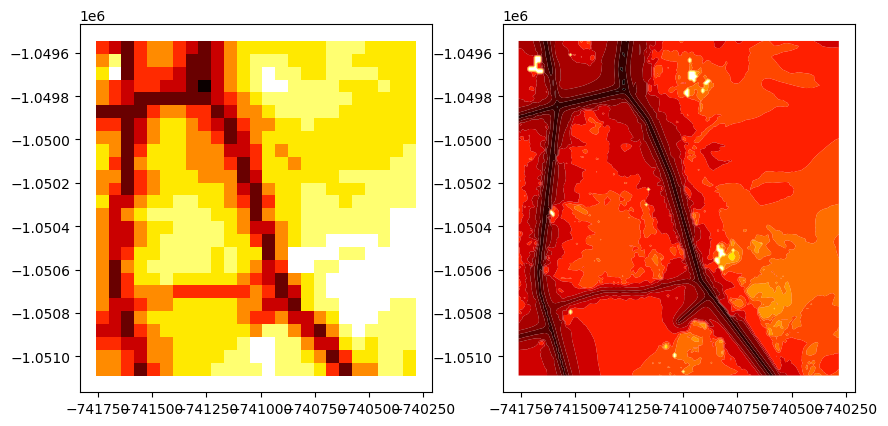

In [77]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))

pixels.plot(
    column="weighted_db_hi",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=1,
    #legend=True,
    #legend_kwds=dict(loc=2),
    ax=ax[0],
)
noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=1,
    #legend=True,
    #legend_kwds=dict(loc=2),
    ax=ax[1],
)
# roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)
# pixels.plot(ax=ax, alpha = 0.2, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
#ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [110]:
len(pixels['max_speed'].unique())

5

d:\Magister\sem2\GeoNoise\.venv\Lib\site-packages\mapclassify\classifiers.py:1653: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


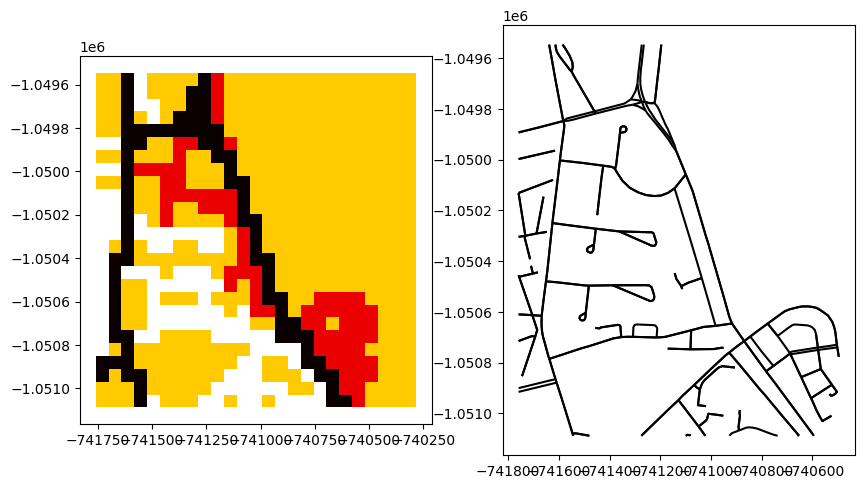

In [109]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))

pixels.plot(
    column="max_speed",
    cmap="hot_r",
    scheme="quantiles",
    k=20,
    edgecolor="white",
    linewidth=0.0,
    alpha=1,
    #legend=True,
    #legend_kwds=dict(loc=2),
    ax=ax[0],
)
# roads_for_pixel.plot(
#     column="maxspeed",
#     cmap="hot_r",
#     scheme="quantiles",
#     k=noise.shape[0],
#     edgecolor="white",
#     linewidth=0.0,
#     alpha=1,
#     #legend=True,
#     #legend_kwds=dict(loc=2),
#     ax=ax[1],
# )
roads_for_pixel.plot(ax=ax[1], alpha = 1, color="black", linewidth=1.5)
# pixels.plot(ax=ax, alpha = 0.2, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
#ax.legend()

# Add title and labels
#ax.set_title("Noise Map and Public Transportation Lines")
#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

# Show the map
plt.show()